# Runtime analysis

In [1]:
import os
import numpy as np
import pandas as pd

from snakemake.utils import Paramspace

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

from itertools import product

In [2]:
test_colors = {
    'CellRegMap': 'royalblue',
    'CellRegMap-FixedSingleEnv': 'orangered',
    'CellRegMap-FixedMultiEnv': 'green',
    'CellRegMap-Association': 'darkred',
}

## Read dataframe with simulation parameters

In [96]:
params = pd.read_csv('../params.csv')
params['outfile'] = [p + '_runtime.txt' for p in Paramspace(params).instance_patterns]

Filter for experiments with no causal GxE effect:

In [97]:
params['exists'] = params['outfile'].apply(lambda x: os.path.exists('../results/simulations/' + x))

In [98]:
params = params.query('exists').reset_index(drop=True)

In [99]:
params['model'] = params['model'].replace({
    'cellregmap': 'CellRegMap',
    'cellregmap_fixed_single_env': 'CellRegMap-FixedSingleEnv',
    'cellregmap_fixed_multi_env': 'CellRegMap-FixedMultiEnv',
    'cellregmap_assoc': 'CellRegMap-Association'
})

In [100]:
def compute_runtime(f):
    fname = '../results/simulations/' + f
    return pd.read_csv(fname, header=None).to_numpy().mean()
params['runtime'] = params['outfile'].apply(compute_runtime) / 2 # 50 SNPs

In [102]:
params.columns = ['n_cells', 'Model', '#Individuals', 'outfile', 'exists', 'runtime']

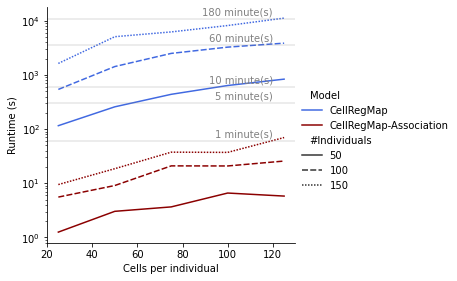

In [114]:
g = sns.relplot(
    kind='line',
    x='n_cells', 
    y='runtime', 
    hue='Model',
    palette=test_colors,
    style='#Individuals',
    data=params,
    aspect=1.2,
    height=4)
ax = g.fig.axes[0]
g.set(xlabel='Cells per individual', ylabel='Runtime (s)')
for c in [60, 5*60, 10*60, 60*60, 180*60]:
    ax.axhline(c, color='grey', alpha=0.2)
    ax.text(120, np.power(10, np.log10(c) + np.log10(1.2)), '%d minute(s)' % (c // 60), c='grey', ha='right')
ax.set(yscale='log')
sns.despine()